<a href="https://colab.research.google.com/github/laistebas/modelos_lineares_generalizados/blob/main/modelos_lineares_generalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os Modelos Lineares Generalizados (GLMs) ampliam os modelos lineares convencionais, possibilitando a análise de variáveis dependentes que seguem diferentes distribuições de probabilidade, como binomial, Poisson e normal. Além disso, permitem capturar relações não-lineares por meio de funções de link, que estabelecem a conexão entre a combinação linear das variáveis independentes e a média da distribuição da variável resposta.

# **Conjunto de dados**

Estão incluídos dois conjuntos de dados, relacionados com amostras de vinho. Dessa forma é possivel verificar a qualidade do vinho.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
c = wine_quality.data.original.color
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
wine_quality.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# **Análise exploratória**

Para a análise exploratória, será utilizado o StandardScaler do sklearn para normalizar as variáveis. Esse algoritmo aplica uma transformação que reescala as variáveis para uma média de 0 e um desvio padrão de 1. Essa normalização é importante porque muitos algoritmos de aprendizado de máquina performam melhor ou convergem mais rapidamente quando os atributos estão na mesma escala.

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["colors"] = c
print(X_scaled_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol colors  
0 -0.915464    red  
1 -0.580068   

Pairplot (seaborn) e calculo da matriz de correlação.

In [8]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

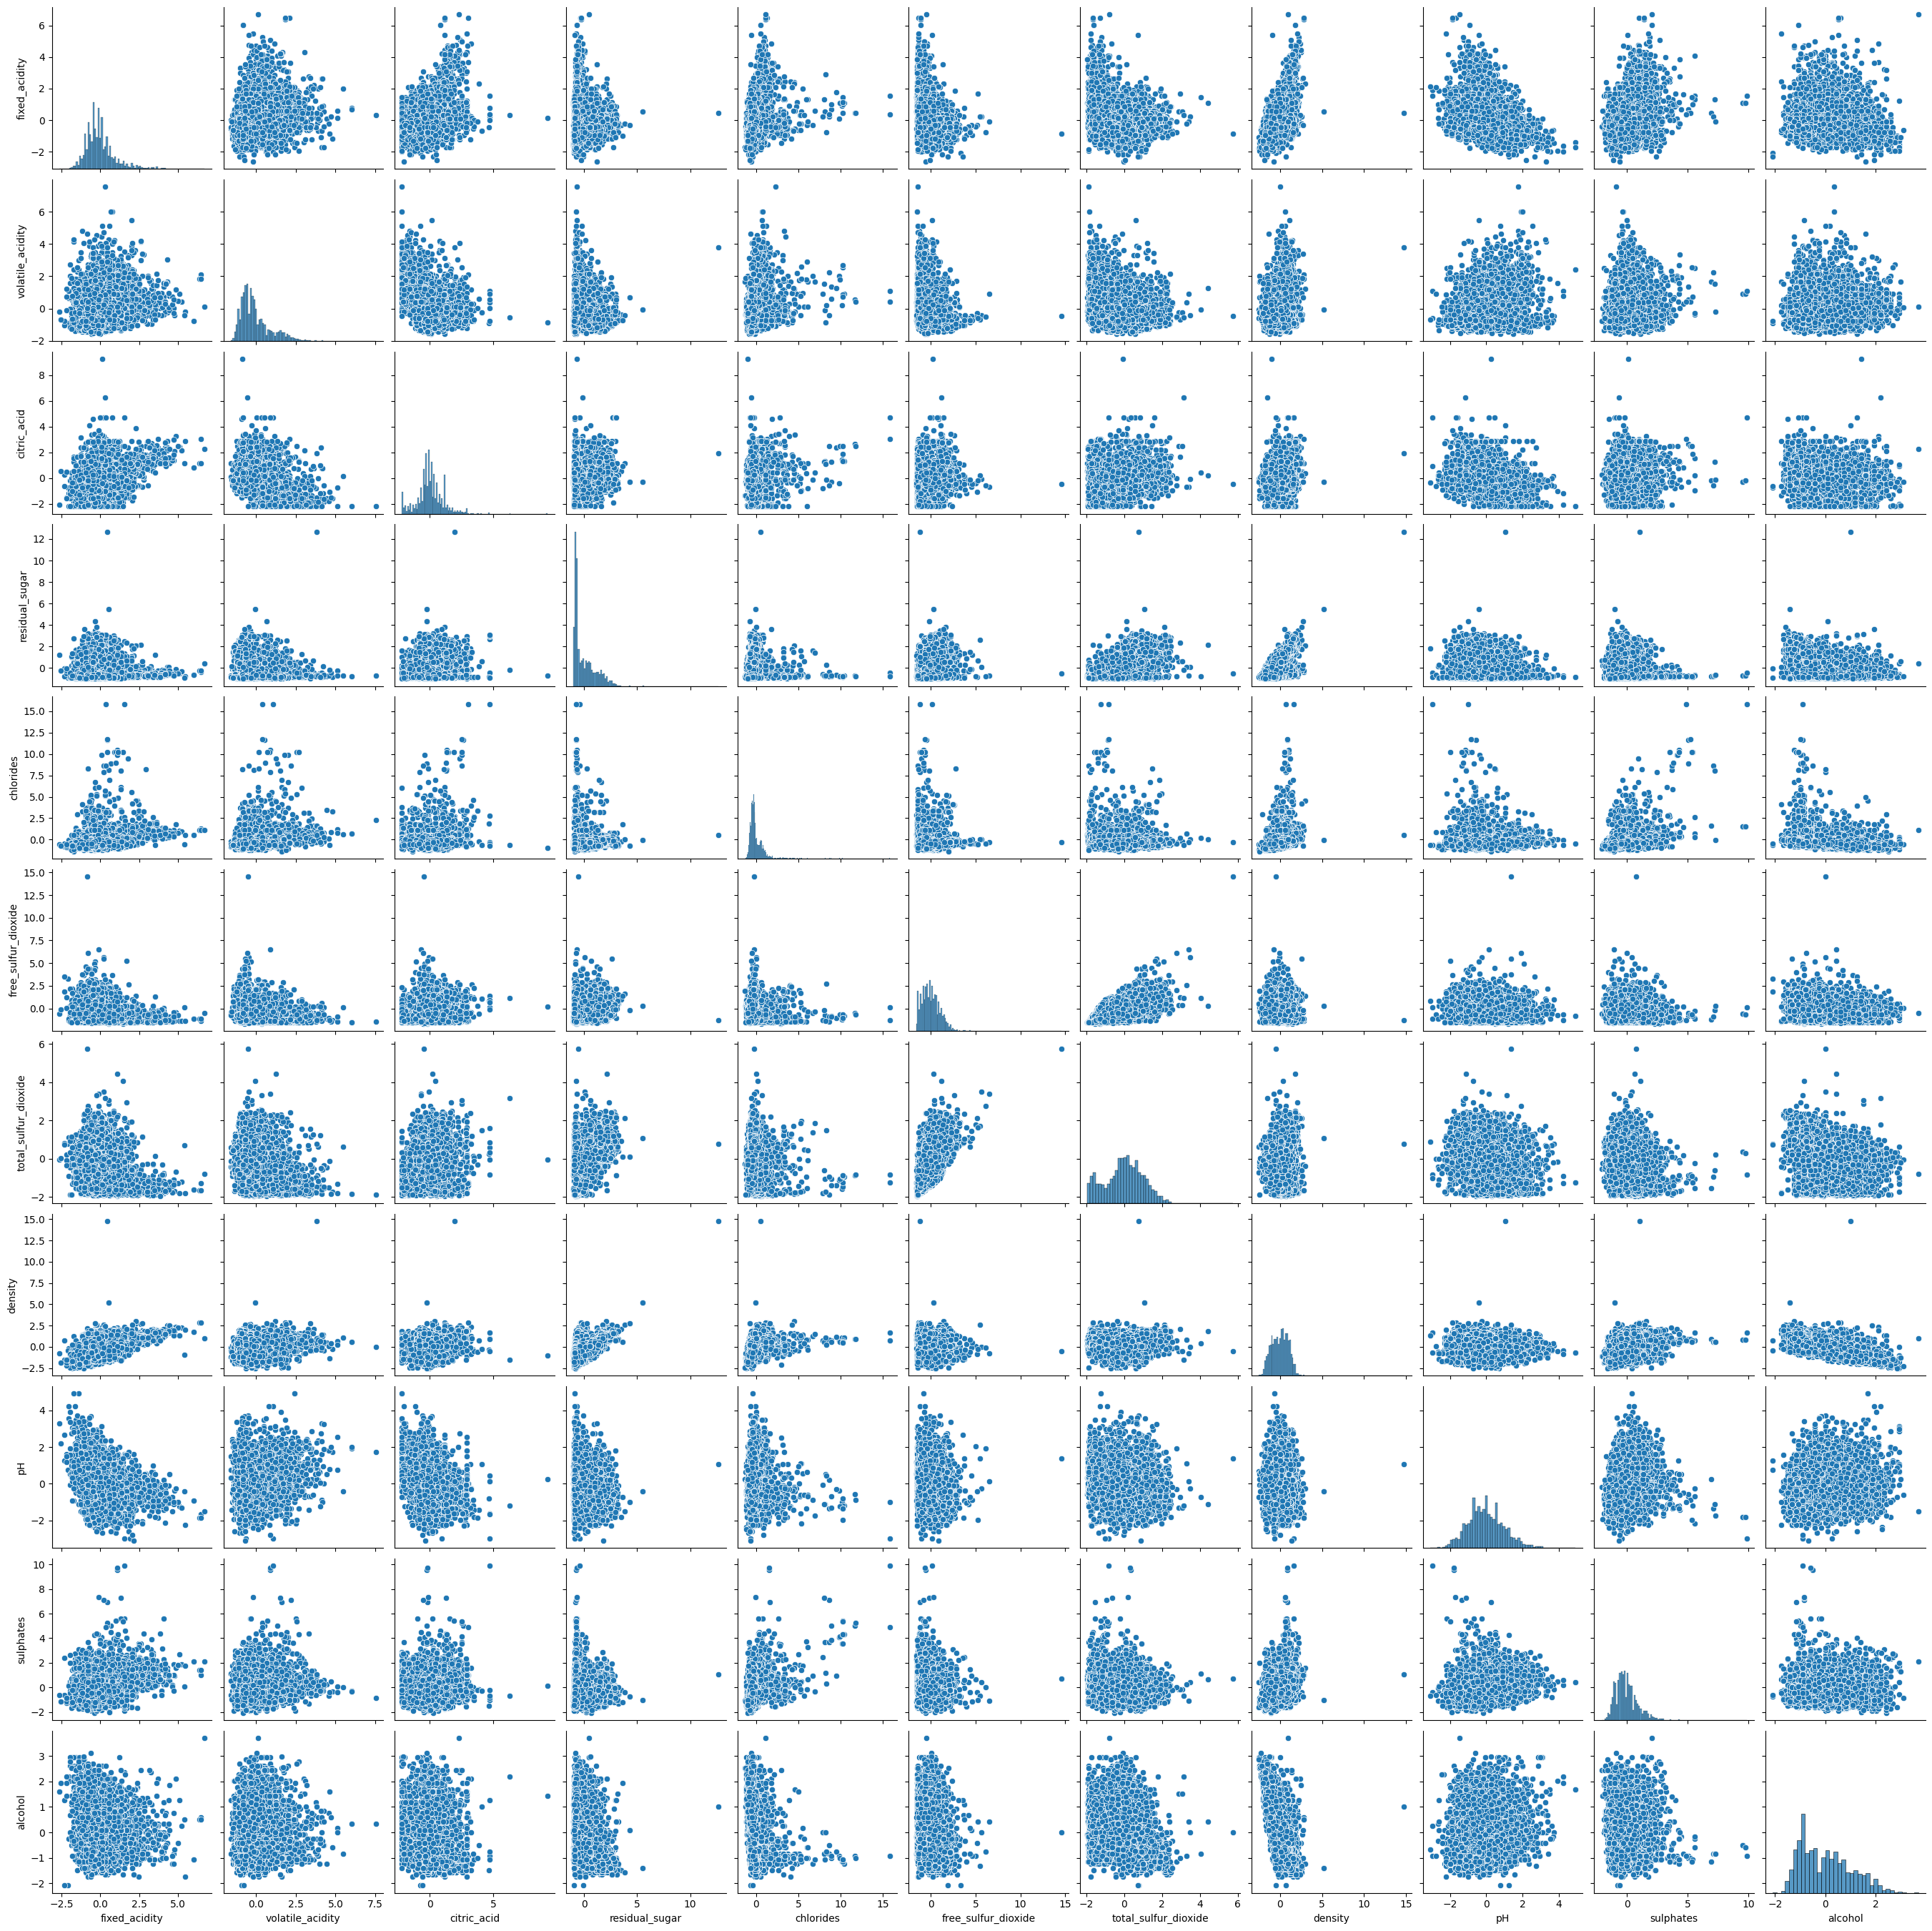

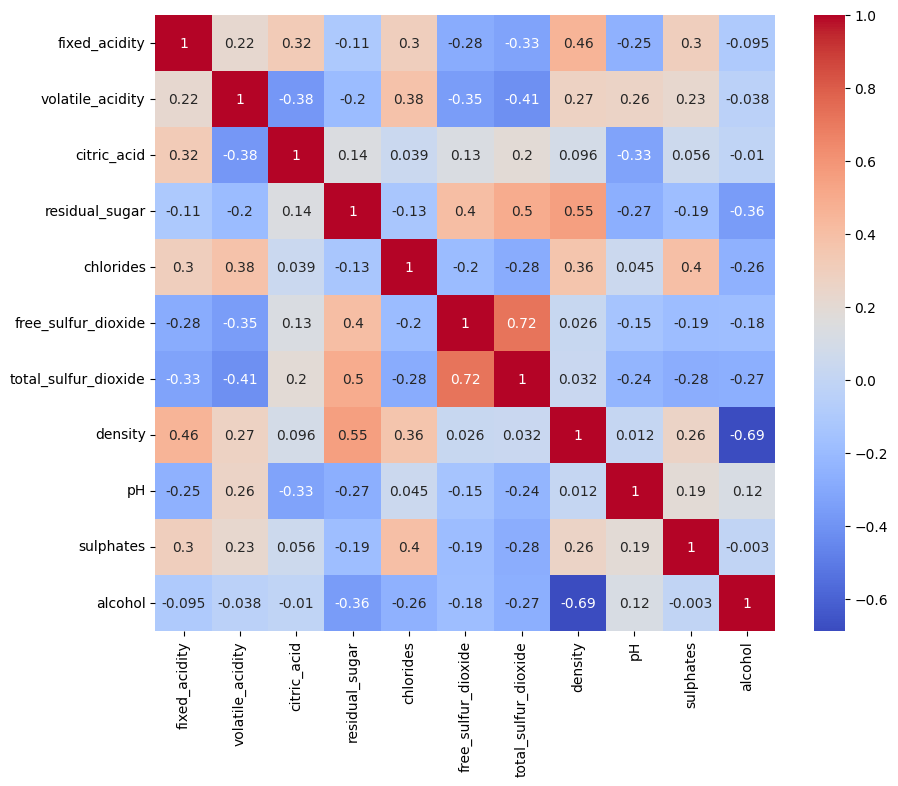

In [10]:
sns.pairplot(X_scaled_df)
plt.show()

numeric_columns = X_scaled_df.select_dtypes(include=np.number).columns
corr_matrix = X_scaled_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

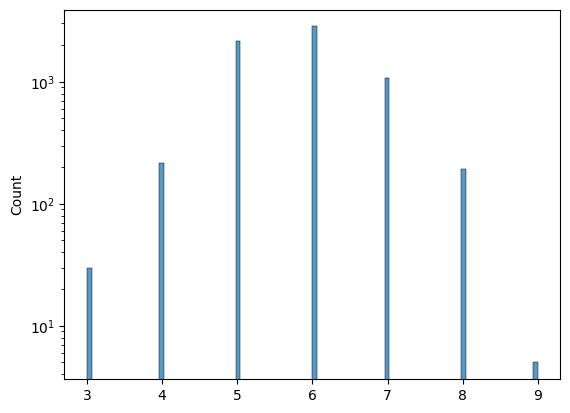

In [11]:
sns.histplot(y.quality.values,bins=100)
plt.yscale('log')
plt.show()

As variáveis free_sulfur_dioxide e total_sulfur_dioxide apresentam uma forte correlação entre si, assim como alcohol e sulphates. Nesse contexto, técnicas de regressão com regularização podem ser vantajosas, pois ajudam a mitigar problemas de multicolinearidade, reduzindo seu impacto sobre o desempenho do modelo. Uma estratégia viável seria remover uma variável de cada par altamente correlacionado – ou seja, optar entre free_sulfur_dioxide e total_sulfur_dioxide, bem como entre alcohol e sulphates – para tornar o modelo mais simples sem comprometer informações relevantes.

Na etapa de preparação dos dados, o conjunto será dividido em dados de treinamento e teste. Para isso, 70% dos dados serão reservados para o treinamento, permitindo que o modelo aprenda os padrões existentes, enquanto os 30% restantes serão utilizados para testar sua capacidade de generalização. Essa divisão é essencial para garantir que o modelo consiga fazer previsões precisas e eficazes em novos dados.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3761,2.070989,0.913197,-0.609973,-0.639680,0.883966,-0.649386,-0.013174,0.034473,-2.789621,-0.613385,-0.915464,white
3740,0.373895,-0.362438,0.215866,2.071864,-0.000967,0.026746,0.022213,1.702006,0.320319,-0.210144,-0.747766,white
1359,3.382379,0.822080,0.559966,-0.849877,0.998151,-1.381861,-1.552520,0.781528,-0.923657,0.797958,-0.384420,red
1230,0.373895,-0.969884,0.147046,-0.576620,0.284496,-0.874763,-1.021711,0.001123,0.942306,1.671647,1.096912,red
4751,0.296754,-0.544672,6.272023,-0.177246,-0.600437,1.153631,3.153986,-1.506327,-1.172452,-0.680592,2.186949,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.296754,-0.119460,1.798725,2.376650,-0.172244,0.702877,0.836120,1.735356,-0.426067,0.058683,-1.083162,white
5191,-1.246058,-0.362438,-0.334694,-0.324384,-0.372068,1.209975,0.747652,-0.892675,0.817909,-0.613385,0.174573,white
5226,-0.628933,0.184263,-0.816433,0.032951,1.740353,1.717074,1.189993,-0.035563,0.133722,-0.680592,-0.831615,white
5390,-0.551792,-0.483928,1.248165,0.537425,-0.143698,0.871910,1.437704,0.221237,-0.239471,-0.411765,-0.831615,white


In [13]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3103,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308,white
1419,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219,red
4761,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610,white
4690,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615,white
4032,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,-1.168917,-0.666161,-0.265874,0.884250,-0.885900,-0.254976,0.092988,-0.732592,0.382517,-1.016626,0.677667,white
3757,0.142473,-0.969884,-0.334694,-0.870896,-0.229336,-0.254976,-0.190111,-0.232332,1.875288,0.865165,0.090724,white
5954,-0.628933,-0.180205,-0.265874,-0.618660,-0.486252,0.195778,0.376086,-1.746451,0.009325,-1.016626,1.851553,white
4418,-0.937495,-0.787650,0.147046,-0.723758,-0.400614,1.829762,0.128375,-1.392935,1.377698,-0.747799,0.761516,white


In [14]:
y_train.quality.values

array([6, 5, 6, ..., 5, 5, 5])

# **Modelo Bayesiano**

In [15]:
df = X_train
fixed_acidity_train = df['fixed_acidity'].values
volatile_acidity_train = df['volatile_acidity'].values
citric_acid_train = df['citric_acid'].values
residual_sugar_train = df['residual_sugar'].values
chlorides_train = df['chlorides'].values
free_sulfur_dioxide_train = df['free_sulfur_dioxide'].values
total_sulfur_dioxide_train = df['total_sulfur_dioxide'].values
density_train = df['density'].values
pH_train = df['pH'].values
sulphates_train = df['sulphates'].values
alcohol_train = df['alcohol'].values
colors_train = df['colors'].values

In [16]:
with pm.Model() as regression:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1)
  eps = pm.HalfNormal("eps",1)

  mu = alpha + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

# **Análise Preditiva a Priori**

In [17]:
with regression:
  trace_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


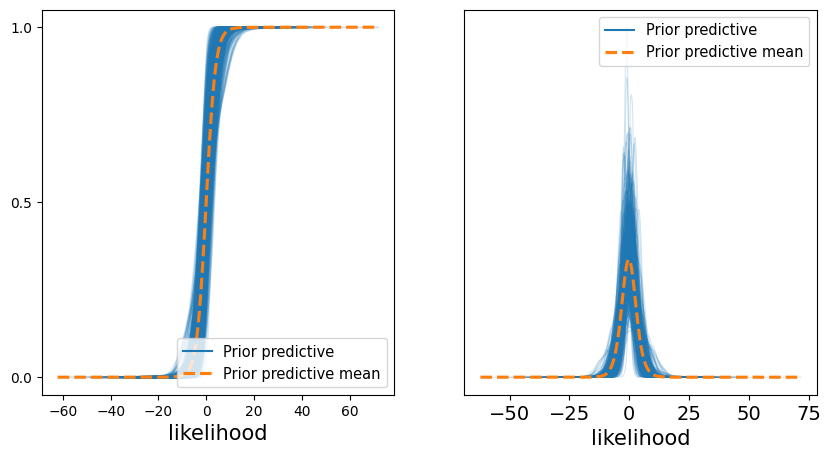

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

# **Aprendizado dos parâmetros**

In [19]:
with regression:
  trace_reg = pm.sample()

pm.summary(trace_reg)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,5.818,0.011,5.797,5.839,0.000,0.000,3205.0,1432.0,1.0
betas[0],0.104,0.024,0.060,0.149,0.001,0.001,1137.0,1534.0,1.0
betas[1],-0.228,0.015,-0.257,-0.199,0.000,0.000,1910.0,1668.0,1.0
betas[2],-0.022,0.014,-0.049,0.003,0.000,0.000,2164.0,1606.0,1.0
betas[3],0.232,0.029,0.174,0.284,0.001,0.001,1025.0,1419.0,1.0
betas[4],-0.002,0.015,-0.031,0.025,0.000,0.000,2076.0,1535.0,1.0
betas[5],0.124,0.017,0.093,0.156,0.000,0.000,2192.0,1467.0,1.0
betas[6],-0.151,0.019,-0.188,-0.115,0.000,0.000,1819.0,1082.0,1.0
betas[7],-0.184,0.043,-0.262,-0.102,0.001,0.001,956.0,1116.0,1.0
betas[8],0.074,0.018,0.041,0.107,0.000,0.000,1409.0,1599.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

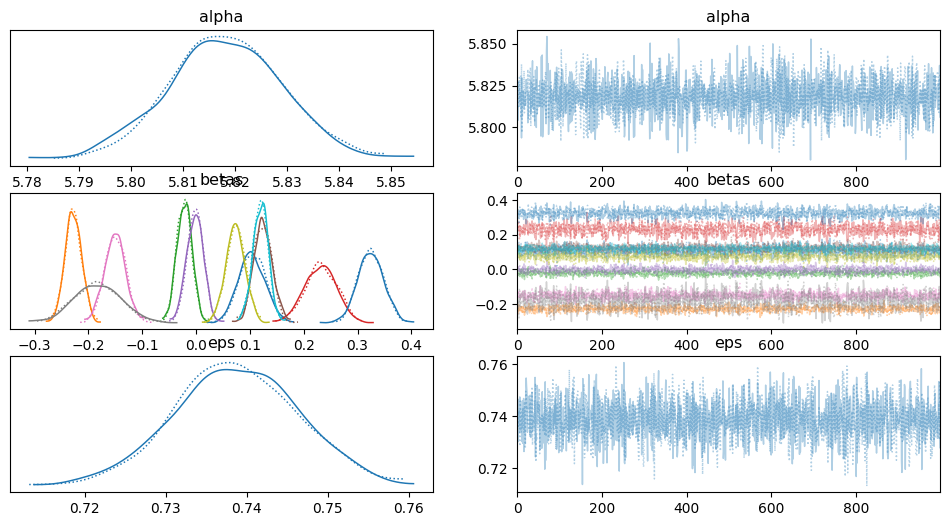

In [20]:
az.plot_trace(trace_reg)

# **Análise Preditiva a Posteriori**

In [21]:
with regression:
    trace_reg_post = pm.sample_posterior_predictive(trace_reg)

Output()

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


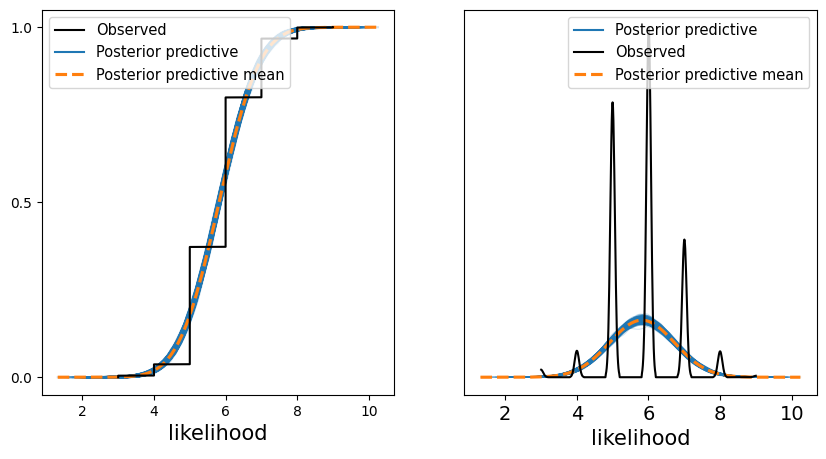

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post, group='posterior', ax=axes[1])

In [23]:
coords = {"colors":np.unique(colors_train)}
colors_idx = pd.Categorical(colors_train, categories=['red', 'white']).codes

with pm.Model(coords=coords) as regression_h:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

# **Modelos Lineares Generalizados (GLMs)**

**Regressão de Poisson**

A regressão de Poisson é usada para modelar contagens ou eventos dentro de um intervalo fixo, assumindo que os dados seguem uma distribuição de Poisson. Esse modelo é adequado quando a variável resposta representa contagens e a variância é aproximadamente igual à média. A relação entre a média da distribuição (λ) e as variáveis independentes (X) é estabelecida por meio da função log como função de link:

*𝑦 ∼ Poisson ( 𝜆 ) , log⁡ ( 𝜆 ) = 𝑎 + 𝛽 ⋅ 𝑋*

Regressão Binomial Negativa

A regressão binomial negativa é uma alternativa para dados de contagem com superdispersão, quando a variância é maior que a média. Esse modelo inclui um parâmetro adicional (θ) para ajustar a dispersão, tornando-o mais flexível do que a regressão de Poisson:

*𝑦 ∼ NegBinom ( 𝜇 , 𝜃 ), log ⁡( 𝜇 ) = 𝛼 + 𝛽 ⋅ 𝑋*


Priori para θ

Na regressão binomial negativa, a distribuição Gamma é frequentemente usada como priori para θ, pois assume apenas valores positivos e permite modelar diferentes níveis de dispersão. Seus parâmetros principais são:



*   Forma (k): Define o formato da distribuição; valores altos geram distribuições mais simétricas.
*   Taxa (τ): Controla a escala; valores altos concentram a distribuição perto de zero.

Essa flexibilidade permite incorporar conhecimento prévio sobre a dispersão dos dados e melhora a inferência bayesiana.

In [24]:
import pytensor.tensor as tt

with pm.Model(coords=coords) as regression_p:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.Poisson("likelihood",tt.exp(mu),observed=y_train.quality.values)

In [25]:
with regression_p:
  trace_p = pm.sample()

pm.summary(trace_p)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[red],1.747,0.054,1.647,1.846,0.001,0.001,1882.0,1496.0,1.00
alpha[white],1.729,0.014,1.703,1.755,0.000,0.000,1623.0,1413.0,1.00
"betas[0, 0]",0.014,0.025,-0.034,0.059,0.001,0.001,1212.0,1457.0,1.00
"betas[0, 1]",0.017,0.019,-0.017,0.052,0.001,0.000,1243.0,1581.0,1.00
"betas[1, 0]",-0.037,0.016,-0.068,-0.007,0.000,0.000,1931.0,1693.0,1.00
"betas[1, 1]",-0.055,0.012,-0.078,-0.032,0.000,0.000,2014.0,1554.0,1.00
"betas[2, 0]",-0.010,0.018,-0.044,0.025,0.000,0.000,1833.0,1426.0,1.01
"betas[2, 1]",-0.000,0.009,-0.018,0.017,0.000,0.000,2438.0,1366.0,1.00
"betas[3, 0]",0.024,0.056,-0.082,0.126,0.002,0.001,1363.0,1496.0,1.00
"betas[3, 1]",0.065,0.025,0.016,0.112,0.001,0.001,1048.0,1089.0,1.00


In [26]:
with regression_p:
    trace_post_p = pm.sample_posterior_predictive(trace_p)

Output()

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


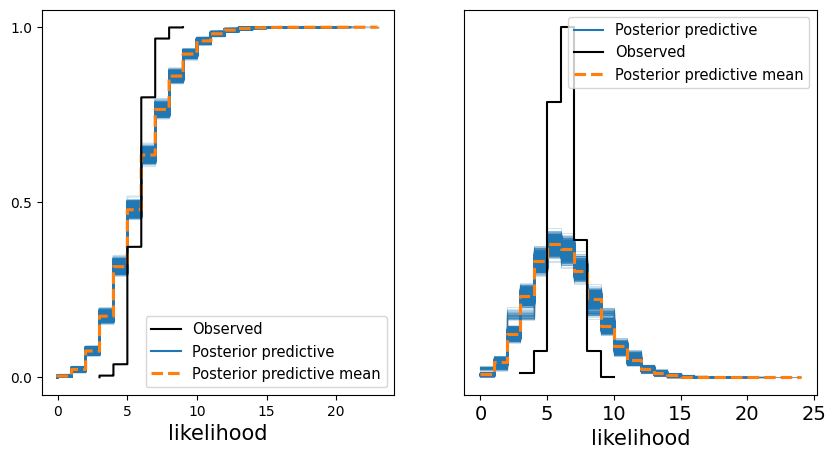

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_post_p, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_post_p, group='posterior', ax=axes[1])

In [28]:
with pm.Model(coords=coords) as regression_nb:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  alpha_disp = pm.Gamma("alpha_disp", alpha=2, beta=0.1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.NegativeBinomial("likelihood", mu=tt.exp(mu), alpha=alpha_disp, observed=y_train.quality.values)

In [29]:
with regression_nb:
  trace_nb = pm.sample()

pm.summary(trace_nb)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[red],1.747,0.054,1.643,1.847,0.001,0.001,1838.0,1510.0,1.00
alpha[white],1.730,0.015,1.704,1.758,0.000,0.000,1599.0,1501.0,1.00
alpha_disp,355.742,44.493,273.561,437.747,0.874,0.643,2749.0,1407.0,1.00
"betas[0, 0]",0.014,0.025,-0.035,0.056,0.001,0.001,1280.0,1279.0,1.01
"betas[0, 1]",0.016,0.018,-0.019,0.051,0.001,0.000,1149.0,1251.0,1.00
"betas[1, 0]",-0.037,0.016,-0.068,-0.007,0.000,0.000,2040.0,1554.0,1.00
"betas[1, 1]",-0.055,0.013,-0.078,-0.031,0.000,0.000,2140.0,1220.0,1.00
"betas[2, 0]",-0.011,0.018,-0.044,0.022,0.000,0.000,2131.0,1453.0,1.00
"betas[2, 1]",-0.000,0.009,-0.018,0.016,0.000,0.000,2147.0,1182.0,1.00
"betas[3, 0]",0.024,0.058,-0.083,0.135,0.002,0.001,1339.0,1375.0,1.00


In [30]:
import pytensor.tensor as tt

with pm.Model(coords=coords) as regression_p_2:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)

  likelihood = pm.Poisson("likelihood",tt.exp(mu),observed=y_train.quality.values)

In [31]:
with regression_p_2:
  trace_p_2 = pm.sample()
pm.summary(trace_p_2)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[red],1.799,0.030,1.742,1.853,0.001,0.001,1024.0,1217.0,1.01
alpha[white],1.744,0.012,1.723,1.765,0.000,0.000,1207.0,1449.0,1.00
betas[0],0.022,0.014,-0.005,0.047,0.000,0.000,814.0,1223.0,1.00
betas[1],-0.045,0.009,-0.062,-0.027,0.000,0.000,1727.0,1656.0,1.00
betas[2],-0.003,0.008,-0.018,0.012,0.000,0.000,2149.0,1384.0,1.00
betas[3],0.054,0.019,0.019,0.090,0.001,0.001,696.0,910.0,1.00
betas[4],-0.002,0.009,-0.018,0.013,0.000,0.000,2415.0,1709.0,1.00
betas[5],0.018,0.010,-0.000,0.036,0.000,0.000,1824.0,1338.0,1.00
betas[6],-0.016,0.013,-0.043,0.007,0.000,0.000,1379.0,1300.0,1.00
betas[7],-0.054,0.029,-0.109,-0.002,0.001,0.001,705.0,849.0,1.00
